In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = sns.load_dataset('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


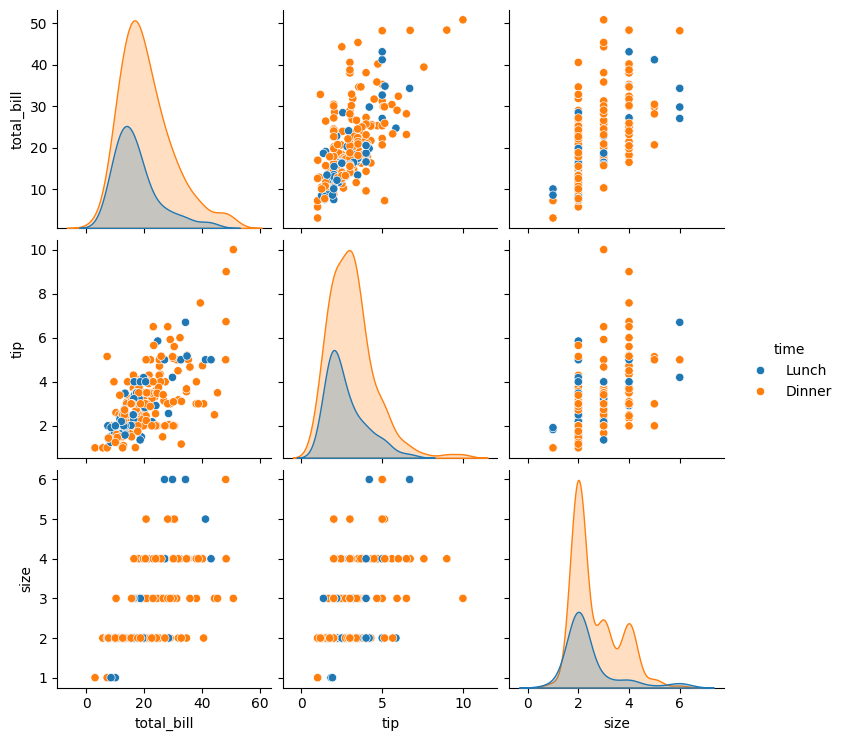

In [8]:
sns.pairplot(data=df,hue='time')

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [10]:
data = pd.DataFrame(ohe.fit_transform(df[['sex','smoker','day']]).toarray(), columns= ohe.get_feature_names_out())

In [11]:
df.drop(['sex','smoker','day'],axis=1,inplace=True)

In [12]:
df

,total_bill,tip,time,size
0,16.99,1.01,Dinner,2
1,10.34,1.66,Dinner,3
2,21.01,3.50,Dinner,3
3,23.68,3.31,Dinner,2
4,24.59,3.61,Dinner,4
...,...,...,...,...
239,29.03,5.92,Dinner,3
240,27.18,2.00,Dinner,2
241,22.67,2.00,Dinner,2
242,17.82,1.75,Dinner,2


In [13]:
df = pd.concat([df,data],axis=1)

In [14]:
df.head()

,total_bill,tip,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
X = df.drop(['time'],axis=1)
y = df['time']

In [16]:
X.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
y.head()

0    Dinner
1    Dinner
2    Dinner
3    Dinner
4    Dinner
Name: time, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

In [18]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=0)

In [19]:
Xtrain.shape, ytrain.shape

((195, 11), (195,))

In [20]:
Xtest.shape, ytest.shape

((49, 11), (49,))

In [21]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [22]:
model.fit(Xtrain,ytrain)

GaussianNB()

In [23]:
y_pred = model.predict(Xtest)

In [24]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

print(f"Accuracy Score: \n{accuracy_score(ytest,y_pred)}")
print("\n-------------------------------------------------------------------------\n")
print(f"Confusion Metrix: \n{confusion_matrix(ytest,y_pred)}")
print("\n-------------------------------------------------------------------------\n")
print(f"Classification Report: \n{classification_report(ytest,y_pred)}")
print("\n-------------------------------------------------------------------------\n")

Accuracy Score: 
0.8775510204081632

-------------------------------------------------------------------------

Confusion Metrix: 
[[34  1]
 [ 5  9]]

-------------------------------------------------------------------------

Classification Report: 
              precision    recall  f1-score   support

      Dinner       0.87      0.97      0.92        35
       Lunch       0.90      0.64      0.75        14

    accuracy                           0.88        49
   macro avg       0.89      0.81      0.83        49
weighted avg       0.88      0.88      0.87        49


-------------------------------------------------------------------------

